In [1]:
%config InlineBackend.figure_formats = ['svg']

In [2]:
import pandas as pd
import oscovida as ov

In [3]:
data = ov.fetch_data_germany()

In [4]:
data.head()

,FID,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
date,,,,,,,,,,,,,,,,,,
2020-03-14,25793576,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/14 00:00:00,1001,"01.08.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt
2020-03-19,25793577,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/19 00:00:00,1001,"01.08.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
2020-03-19,25793578,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/19 00:00:00,1001,"01.08.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt
2020-03-21,25793579,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/21 00:00:00,1001,"01.08.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
2020-03-27,25793580,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/27 00:00:00,1001,"01.08.2020, 00:00 Uhr",0,-9,2020/03/22 00:00:00,0,1,1,Nicht übermittelt


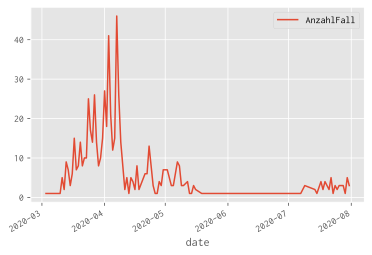

In [5]:
df4 = data.groupby(["Landkreis", "date"]).agg({'AnzahlFall': 'sum'})
df4.loc["LK Pinneberg"].plot()

In [6]:
total_infections = df4.unstack().sum().sum()
total_infections

209641.0

In [7]:
# df4_b = df4.unstack(level=0).resample("1D").asfreq().fillna(0)
# assert df4_b.sum().sum() == total_infections

In [8]:
# df4.loc["SK Emden"].resample("1D").asfreq().fillna(0)

In [9]:
# df4.unstack() #.T.resample("1D").asfreq().fillna(0)

In [10]:
# df4.unstack(level=0)

In [11]:
df4.index

MultiIndex([(      'LK Ahrweiler', '2020-03-12'),
            (      'LK Ahrweiler', '2020-03-13'),
            (      'LK Ahrweiler', '2020-03-14'),
            (      'LK Ahrweiler', '2020-03-16'),
            (      'LK Ahrweiler', '2020-03-17'),
            (      'LK Ahrweiler', '2020-03-18'),
            (      'LK Ahrweiler', '2020-03-19'),
            (      'LK Ahrweiler', '2020-03-20'),
            (      'LK Ahrweiler', '2020-03-21'),
            (      'LK Ahrweiler', '2020-03-22'),
            ...
            ('StadtRegion Aachen', '2020-07-20'),
            ('StadtRegion Aachen', '2020-07-21'),
            ('StadtRegion Aachen', '2020-07-22'),
            ('StadtRegion Aachen', '2020-07-23'),
            ('StadtRegion Aachen', '2020-07-24'),
            ('StadtRegion Aachen', '2020-07-27'),
            ('StadtRegion Aachen', '2020-07-28'),
            ('StadtRegion Aachen', '2020-07-29'),
            ('StadtRegion Aachen', '2020-07-30'),
            ('StadtRegion Aachen',

In [12]:
df4_resampled = df4.unstack(level=0).resample("1D").asfreq().stack(level=0).fillna(0)
assert df4_resampled.sum().sum() == total_infections
df4_resampled2 = df4_resampled.copy()

In [13]:
tmp = df4_resampled.T.stack().stack()

In [14]:
tmp.index

MultiIndex([(      'LK Ahrweiler', 'AnzahlFall', '2020-01-28'),
            (      'LK Ahrweiler', 'AnzahlFall', '2020-01-29'),
            (      'LK Ahrweiler', 'AnzahlFall', '2020-01-31'),
            (      'LK Ahrweiler', 'AnzahlFall', '2020-02-03'),
            (      'LK Ahrweiler', 'AnzahlFall', '2020-02-04'),
            (      'LK Ahrweiler', 'AnzahlFall', '2020-02-06'),
            (      'LK Ahrweiler', 'AnzahlFall', '2020-02-07'),
            (      'LK Ahrweiler', 'AnzahlFall', '2020-02-11'),
            (      'LK Ahrweiler', 'AnzahlFall', '2020-02-12'),
            (      'LK Ahrweiler', 'AnzahlFall', '2020-02-20'),
            ...
            ('StadtRegion Aachen', 'AnzahlFall', '2020-07-22'),
            ('StadtRegion Aachen', 'AnzahlFall', '2020-07-23'),
            ('StadtRegion Aachen', 'AnzahlFall', '2020-07-24'),
            ('StadtRegion Aachen', 'AnzahlFall', '2020-07-25'),
            ('StadtRegion Aachen', 'AnzahlFall', '2020-07-26'),
            ('StadtRegio

In [15]:
tmp.index = tmp.index.droplevel(level=1)

In [16]:
tmp.unstack().stack()

Landkreis           date      
LK Ahrweiler        2020-01-28     0.0
                    2020-01-29     0.0
                    2020-01-31     0.0
                    2020-02-03     0.0
                    2020-02-04     0.0
                                  ... 
StadtRegion Aachen  2020-07-27     3.0
                    2020-07-28     9.0
                    2020-07-29     4.0
                    2020-07-30    13.0
                    2020-07-31     2.0
Length: 70040, dtype: float64

In [17]:
df4_resampled2.index = df4_resampled.index.droplevel(level=1)

In [18]:
df4_resampled2.stack()

date        Landkreis           
2020-01-28  LK Ahrweiler            0.0
            LK Aichach-Friedberg    0.0
            LK Alb-Donau-Kreis      0.0
            LK Altenburger Land     0.0
            LK Altenkirchen         0.0
                                   ... 
2020-07-31  SK Worms                0.0
            SK Wuppertal            4.0
            SK Würzburg             0.0
            SK Zweibrücken          0.0
            StadtRegion Aachen      2.0
Length: 70040, dtype: float64

In [19]:
df5 = tmp

In [20]:
pd.set_option("display.max_rows",1000)
df4.loc["SK Emden"]

,AnzahlFall
date,
2020-03-11,3
2020-03-16,1
2020-03-17,3
2020-03-31,1
2020-04-03,1
2020-04-04,2
2020-04-06,1
2020-04-08,2
2020-04-15,1


In [21]:
df5.loc["SK Emden"]

date
2020-01-28    0.0
2020-01-29    0.0
2020-01-31    0.0
2020-02-03    0.0
2020-02-04    0.0
2020-02-06    0.0
2020-02-07    0.0
2020-02-11    0.0
2020-02-12    0.0
2020-02-20    0.0
2020-02-22    0.0
2020-02-24    0.0
2020-02-25    0.0
2020-02-26    0.0
2020-02-27    0.0
2020-02-28    0.0
2020-02-29    0.0
2020-03-01    0.0
2020-03-02    0.0
2020-03-03    0.0
2020-03-04    0.0
2020-03-05    0.0
2020-03-06    0.0
2020-03-07    0.0
2020-03-08    0.0
2020-03-09    0.0
2020-03-10    0.0
2020-03-11    3.0
2020-03-12    0.0
2020-03-13    0.0
2020-03-14    0.0
2020-03-15    0.0
2020-03-16    1.0
2020-03-17    3.0
2020-03-18    0.0
2020-03-19    0.0
2020-03-20    0.0
2020-03-21    0.0
2020-03-22    0.0
2020-03-23    0.0
2020-03-24    0.0
2020-03-25    0.0
2020-03-26    0.0
2020-03-27    0.0
2020-03-28    0.0
2020-03-29    0.0
2020-03-30    0.0
2020-03-31    1.0
2020-04-01    0.0
2020-04-02    0.0
2020-04-03    1.0
2020-04-04    2.0
2020-04-05    0.0
2020-04-06    1.0
2020-04-07    0.0
2020-

In [22]:
#df5 = df4.groupby([pd.Grouper(level='Landkreis'), 
#                   pd.Grouper(level='date', freq='7D')]
#                  ).sum()

In [23]:
df5

Landkreis           date      
LK Ahrweiler        2020-01-28     0.0
                    2020-01-29     0.0
                    2020-01-31     0.0
                    2020-02-03     0.0
                    2020-02-04     0.0
                                  ... 
StadtRegion Aachen  2020-07-27     3.0
                    2020-07-28     9.0
                    2020-07-29     4.0
                    2020-07-30    13.0
                    2020-07-31     2.0
Length: 70040, dtype: float64

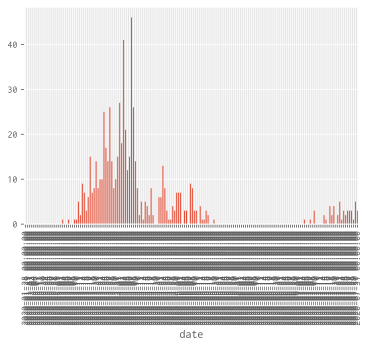

In [24]:
df5.loc["LK Pinneberg"].plot(kind='bar')

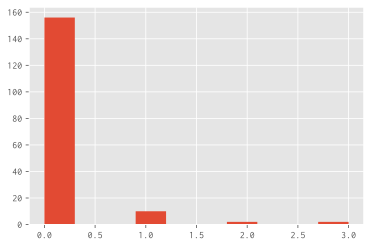

In [25]:
df5.loc["SK Emden"].hist()

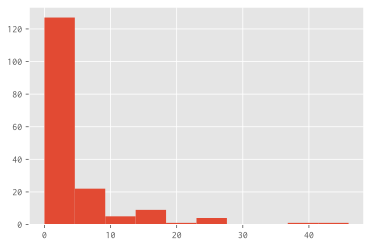

In [26]:
df5.loc["LK Pinneberg"].hist()

In [27]:
df5.loc["LK Pinneberg"]

date
2020-01-28     0.0
2020-01-29     0.0
2020-01-31     0.0
2020-02-03     0.0
2020-02-04     0.0
2020-02-06     0.0
2020-02-07     0.0
2020-02-11     0.0
2020-02-12     0.0
2020-02-20     0.0
2020-02-22     0.0
2020-02-24     0.0
2020-02-25     0.0
2020-02-26     0.0
2020-02-27     0.0
2020-02-28     0.0
2020-02-29     0.0
2020-03-01     0.0
2020-03-02     0.0
2020-03-03     1.0
2020-03-04     0.0
2020-03-05     0.0
2020-03-06     1.0
2020-03-07     0.0
2020-03-08     0.0
2020-03-09     1.0
2020-03-10     1.0
2020-03-11     5.0
2020-03-12     2.0
2020-03-13     9.0
2020-03-14     7.0
2020-03-15     3.0
2020-03-16     6.0
2020-03-17    15.0
2020-03-18     7.0
2020-03-19     8.0
2020-03-20    14.0
2020-03-21     8.0
2020-03-22    10.0
2020-03-23    10.0
2020-03-24    25.0
2020-03-25    17.0
2020-03-26    14.0
2020-03-27    26.0
2020-03-28    14.0
2020-03-29     8.0
2020-03-30    10.0
2020-03-31    15.0
2020-04-01    27.0
2020-04-02    18.0
2020-04-03    41.0
2020-04-04    21.0
2020-04

In [28]:
df5.sum().sum()

209641.0

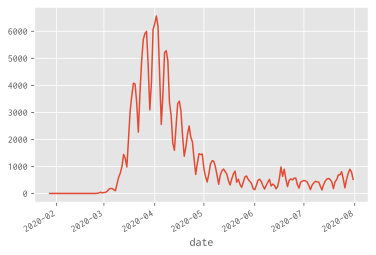

In [29]:
df6a = df5.unstack().T
df6a.sum(axis=1).plot()

In [30]:
df6 = df6a.resample("7D").sum()

In [31]:
df6a.sum().sum()

209641.0

In [32]:
# compute bins for histograms
import numpy as np

data_max_value = int(df6.max().max())
bins_max_value = 100
bins_width = 5
nbins = bins_max_value // bins_width + 1
print(f"Using {nbins} bins")
# equidistant bins
bins0 = np.linspace(0, nbins * bins_width, nbins + 1)
# add a bin for zero to 1 at the beginning
bins1 = [0] + list(bins0)
bins1[1] = 1
assert bins1[0] == 0
assert bins1[1] == 1
assert bins1[2] == bins_width


bins = bins1

# for later: add large boundary at right
assert bins[-1] > bins_max_value
# needed for histogram command
bins_with_right_edge = list(bins)+[bins[-1] + bins_width]
# bins_with_right_edge = list(bins)+[bins_max_value + 1]
bins_with_right_edge[0:5]

Using 21 bins


[0, 1, 5.0, 10.0, 15.0]

In [33]:
# compute week of the year to place histogram
week_of_the_year = [x.week for x in df6.index[:]]
week_of_the_year_date = [x.strftime('%Y-%m-%d') for x in df6.index[:]]

In [34]:
df6.index

DatetimeIndex(['2020-01-28', '2020-02-04', '2020-02-11', '2020-02-18',
               '2020-02-25', '2020-03-03', '2020-03-10', '2020-03-17',
               '2020-03-24', '2020-03-31', '2020-04-07', '2020-04-14',
               '2020-04-21', '2020-04-28', '2020-05-05', '2020-05-12',
               '2020-05-19', '2020-05-26', '2020-06-02', '2020-06-09',
               '2020-06-16', '2020-06-23', '2020-06-30', '2020-07-07',
               '2020-07-14', '2020-07-21', '2020-07-28'],
              dtype='datetime64[ns]', name='date', freq='7D')

In [35]:
list(zip(week_of_the_year, week_of_the_year_date))

[(5, '2020-01-28'),
 (6, '2020-02-04'),
 (7, '2020-02-11'),
 (8, '2020-02-18'),
 (9, '2020-02-25'),
 (10, '2020-03-03'),
 (11, '2020-03-10'),
 (12, '2020-03-17'),
 (13, '2020-03-24'),
 (14, '2020-03-31'),
 (15, '2020-04-07'),
 (16, '2020-04-14'),
 (17, '2020-04-21'),
 (18, '2020-04-28'),
 (19, '2020-05-05'),
 (20, '2020-05-12'),
 (21, '2020-05-19'),
 (22, '2020-05-26'),
 (23, '2020-06-02'),
 (24, '2020-06-09'),
 (25, '2020-06-16'),
 (26, '2020-06-23'),
 (27, '2020-06-30'),
 (28, '2020-07-07'),
 (29, '2020-07-14'),
 (30, '2020-07-21'),
 (31, '2020-07-28')]

In [36]:
# drop last week??

In [37]:
# suitable colours
def my_colours(n, alpha=0.1):
    import matplotlib
    #colours = matplotlib.pyplot.cm.rainbow(np.linspace(0, 1, n), alpha=alpha)
    #colours = matplotlib.pyplot.cm.RdYlGn(np.linspace(0, 1, n), alpha=alpha)
    colours = list(reversed(matplotlib.pyplot.cm.autumn(np.linspace(0, 1, n), alpha=alpha)))
    # first colour green
    colours[0] = [0, 1, 0, 1.0 + 0*alpha]
 
    return colours

print(my_colours(50))

[[0, 1, 0, 1.0], array([1.        , 0.98039216, 0.        , 0.1       ]), array([1.        , 0.96078431, 0.        , 0.1       ]), array([1.        , 0.94117647, 0.        , 0.1       ]), array([1.        , 0.92156863, 0.        , 0.1       ]), array([1.        , 0.89803922, 0.        , 0.1       ]), array([1.        , 0.87843137, 0.        , 0.1       ]), array([1.        , 0.85882353, 0.        , 0.1       ]), array([1.        , 0.83921569, 0.        , 0.1       ]), array([1.        , 0.81568627, 0.        , 0.1       ]), array([1.        , 0.79607843, 0.        , 0.1       ]), array([1.        , 0.77647059, 0.        , 0.1       ]), array([1.        , 0.75686275, 0.        , 0.1       ]), array([1.       , 0.7372549, 0.       , 0.1      ]), array([1.        , 0.71372549, 0.        , 0.1       ]), array([1.        , 0.69411765, 0.        , 0.1       ]), array([1.       , 0.6745098, 0.       , 0.1      ]), array([1.        , 0.65490196, 0.        , 0.1       ]), array([1.        , 0.6

found 27 data sets
22 17 0 167.0
1-week zero incidences: 91
23 18 1 143.0
1-week zero incidences: 103
24 19 2 123.0
1-week zero incidences: 137
25 20 3 1128.0
1-week zero incidences: 125
26 21 4 365.0
1-week zero incidences: 128
27 22 5 138.0
1-week zero incidences: 105
28 23 6 108.0
1-week zero incidences: 110
29 24 7 125.0
1-week zero incidences: 97
30 25 8 190.0
1-week zero incidences: 87
31 26 9 72.0
1-week zero incidences: 94


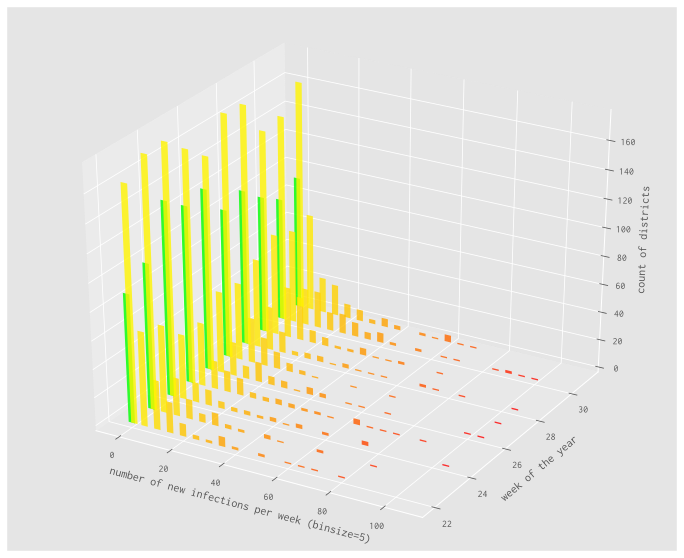

In [38]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
n = len(week_of_the_year)
print(f"found {n} data sets")
last_n_weeks = 10

# gather results in matrix
m_i = 0
m = np.zeros(shape=(last_n_weeks, len(bins)))

for c, z, i in zip(my_colours(last_n_weeks), week_of_the_year[-last_n_weeks:], range(n-last_n_weeks, n)):
    print(z, i, m_i, df6.iloc[i, :].max())
    xs = bins
    count, bins_ = np.histogram(df6.iloc[i,:], bins=bins_with_right_edge)
    m[m_i, :] = count[:]
    m_i += 1
    print(f"1-week zero incidences: {count[0]}")
    ys = count

    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    cs = [c] * len(xs)
    cs = my_colours(len(xs))
    # cs[0] = 'c'
    ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.8, width=0.5*bins_width)

ax.set_xlabel(f'number of new infections per week (binsize={bins_width})')
ax.set_zlabel('count of districts')
ax.set_ylabel('week of the year')

plt.show()

In [40]:
!pwd

/Users/fangohr/git/oscovida/tools/pelican/content/ipynb


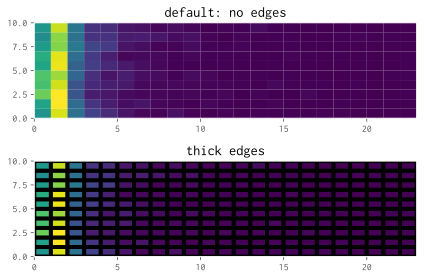

In [44]:
fig, (ax0, ax1) = plt.subplots(2, 1)

c = ax0.pcolor(m)
ax0.set_title('default: no edges')
# plt.colorbar()

c = ax1.pcolor(m, edgecolors='k', linewidths=4)
ax1.set_title('thick edges')

fig.tight_layout()
plt.show()

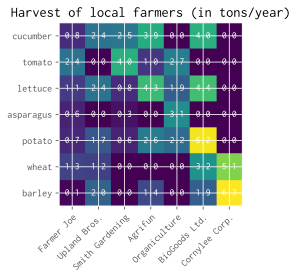

In [45]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()
